In [1]:
import pandas as pd
import torch
import os

C:\Users\elder\miniconda3\envs\test_exercise_cv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATA_FILEPATH = "data\GrayScaleTrain"

APPLICATION_NAME = "train"
DATA_FILEPATH = "data\GrayScaleTrain"
RESIZE_SIZE = 224
IMAGE_CHANNELS = 3
NUM_CLASSES = 10
NUM_EPOCHS = 10
BATCH_SIZE = 16
LR = 3e-4
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
torch.cuda.is_available()

True

In [4]:
os.listdir(DATA_FILEPATH)

['Arsenal',
 'Barcelona',
 'Bayern',
 'Chelsea',
 'Juventus',
 'Liverpool',
 'ManchesterCity',
 'ManchesterUnited',
 'PSG',
 'Real']

In [5]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms

In [6]:
transform = transforms.Compose([
    transforms.Resize([224,224]),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5)),
])

In [7]:
train = True

In [8]:
images = ImageFolder(DATA_FILEPATH, transform=transform)

In [9]:
dataloader = DataLoader(
    dataset=images,
    batch_size=16,
    shuffle=True,
    pin_memory=True,
    drop_last=True,
)

In [10]:
for i in dataloader:
    batch_x, batch_y = next(iter(dataloader))
    break

In [11]:
batch_x, batch_y = next(iter(dataloader))
batch_x[0].shape

torch.Size([3, 224, 224])

In [12]:
 batch_x[0][0].size()

torch.Size([224, 224])

In [13]:
def prepare_data():
    setup_logging()
    transform = transforms.Compose([
        transforms.Resize([RESIZE_SIZE, RESIZE_SIZE]),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ])
    images = ImageFolder(DATA_FILEPATH, transform=transform)
    dataloader = DataLoader(
        dataset=images,
        batch_size=BATCH_SIZE,
        shuffle=True,
        pin_memory=True,
        drop_last=True,
    )
    logger.info("Data is ready.")
    return dataloader

In [22]:
50176 * 3

150528

In [26]:
images.class_to_idx

{'Arsenal': 0,
 'Barcelona': 1,
 'Bayern': 2,
 'Chelsea': 3,
 'Juventus': 4,
 'Liverpool': 5,
 'ManchesterCity': 6,
 'ManchesterUnited': 7,
 'PSG': 8,
 'Real': 9}

In [27]:
images.classes

['Arsenal',
 'Barcelona',
 'Bayern',
 'Chelsea',
 'Juventus',
 'Liverpool',
 'ManchesterCity',
 'ManchesterUnited',
 'PSG',
 'Real']

In [23]:
dir(images)

['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_format_transform_repr',
 '_is_protocol',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'extensions',
 'extra_repr',
 'find_classes',
 'imgs',
 'loader',
 'make_dataset',
 'root',
 'samples',
 'target_transform',
 'targets',
 'transform',
 'transforms']

In [14]:
EXAMPLE_IMAGE_FILEPATH = "data\GrayScaleTrain\Arsenal\\6043d6ea-7839-11ec-983f-a9a6a9ca2e41.jpg"

In [15]:
from PIL import Image

In [17]:
img = Image.open(EXAMPLE_IMAGE_FILEPATH).convert("RGB")

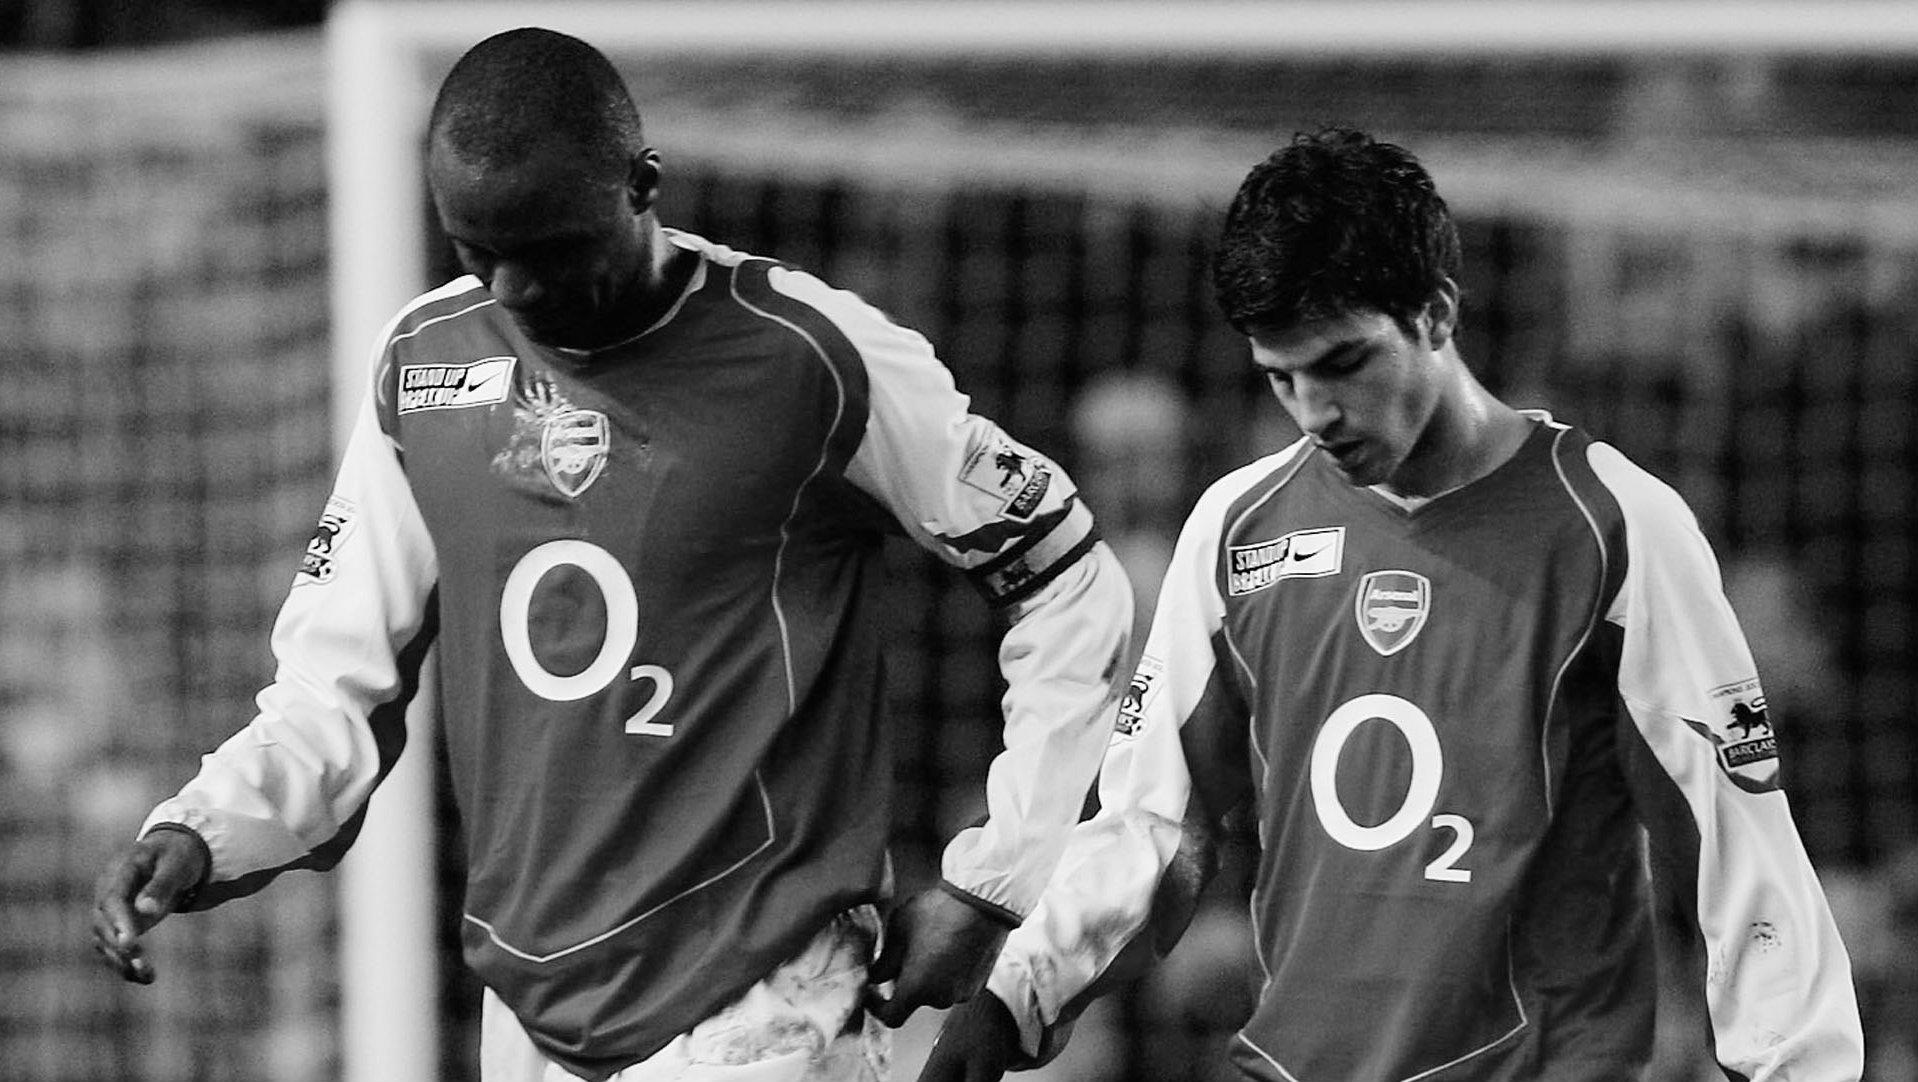

In [18]:
img

In [19]:
transform = transforms.Compose([
    transforms.Resize([RESIZE_SIZE, RESIZE_SIZE]),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
])

In [20]:
transform(img)

tensor([[[-0.8824, -0.9059, -0.8902,  ...,  0.4745,  0.4667,  0.4745],
         [-0.8980, -0.9059, -0.8902,  ...,  0.5451,  0.5529,  0.5451],
         [-0.9216, -0.9294, -0.8980,  ...,  0.5922,  0.6000,  0.6000],
         ...,
         [-0.3647, -0.2863, -0.2706,  ..., -0.1922, -0.2314, -0.3490],
         [-0.4039, -0.3255, -0.3490,  ..., -0.1765, -0.2314, -0.3412],
         [-0.4745, -0.4118, -0.3961,  ..., -0.1843, -0.2314, -0.3804]],

        [[-0.8824, -0.9059, -0.8902,  ...,  0.4745,  0.4667,  0.4745],
         [-0.8980, -0.9059, -0.8902,  ...,  0.5451,  0.5529,  0.5451],
         [-0.9216, -0.9294, -0.8980,  ...,  0.5922,  0.6000,  0.6000],
         ...,
         [-0.3647, -0.2863, -0.2706,  ..., -0.1922, -0.2314, -0.3490],
         [-0.4039, -0.3255, -0.3490,  ..., -0.1765, -0.2314, -0.3412],
         [-0.4745, -0.4118, -0.3961,  ..., -0.1843, -0.2314, -0.3804]],

        [[-0.8824, -0.9059, -0.8902,  ...,  0.4745,  0.4667,  0.4745],
         [-0.8980, -0.9059, -0.8902,  ...,  0

In [21]:
MODEL_FILEPATH = "models/resnet.pt"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [22]:
model = torch.load(MODEL_FILEPATH)

In [23]:
model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (2): ResidualBlock(num_input_features=64, num_features=64, num_layers=2, with_bn=True)
  	Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  	Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (3): ResidualBlock(num_input_features=64, num_features=64, num_layers=2, with_bn=True)
  	Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=

In [24]:
img = Image.open(EXAMPLE_IMAGE_FILEPATH).convert("RGB")
transform = transforms.Compose([
    transforms.Resize([RESIZE_SIZE, RESIZE_SIZE]),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
])
img = transform(img).to(DEVICE)

In [25]:
torch.concat([img] * BATCH_SIZE).reshape(BATCH_SIZE, 3, 224, 224).shape

torch.Size([16, 3, 224, 224])

In [26]:
BATCH_SIZE = 16

In [27]:
img.shape

torch.Size([3, 224, 224])

In [28]:
logit = model(torch.concat([img] * BATCH_SIZE).reshape(BATCH_SIZE, 3, 224, 224).to(DEVICE))

In [30]:
torch.argmax(logit).item()

0

In [31]:
images.classes

['Arsenal',
 'Barcelona',
 'Bayern',
 'Chelsea',
 'Juventus',
 'Liverpool',
 'ManchesterCity',
 'ManchesterUnited',
 'PSG',
 'Real']